# Tests Joint State Pedigree distribution
 This file tests `i_state_dsn_pedigree_triat.jl` which defines a set of function to analyze a population model that tracks the abudance and distribtuion of a quantitative trait in a populaiton. It also trackes the distribtuion of the proportion of ancestry each individuals has from a neighboring population that immigrates to the local population. I refer to this quanityt as the pedigree. The immigrants are adapted to a differnt envirnment which effects te fittness of individuals with immigrant ancestry.
 
The model works by traking the joint distribution over the trait value and pedigree for the population. The convolution theorem is used to update the distribution for each generation assuming random mating. The code seems to behave as expected and reproduces some expected results as shown below. I also found that the distributions may be aproximated quite well by tracking the distribution of pedigrees and the mean trait value conditional on the pedigree. This would reduce the number of state varaibles racked by the model by three orders of magnitude. 

In [1571]:
using FFTW
using DSP
using Plots
using Distributions

In [1621]:
include("i_state_dsn_pedigree_triat.jl")

Main.i_state_dsn_pedigree_trait

In [1657]:
## define populaiton
theta = 5.0
Vle = 1.0
pop = i_state_dsn_pedigree_trait.init_population(7, [0.9,0.9,0.9,0.9,0.7,0.6,0.2], [0.0,0.0,0.2,0.3,0.3,0.3,0.2],
5 , 1, 0, 0.1, -10, 15.025, 0.025,4, Vle)
print(" ")


In [1666]:
# update trait distribution 
for i in 1:5
    # reproduction 
    dsn,r = i_state_dsn_pedigree_trait.reproduction(pop)
    
    # selection 
    dsn, N = i_state_dsn_pedigree_trait.selection(dsn, 1, pop)
    
    # density dependence
    N = i_state_dsn_pedigree_trait.recruitment(N, pop)
    
    # immigration 
    d = Distributions.Normal(theta,Vle)
    dsn_im = pdf.(d,pop.grid_z)
    dsn_im = dsn_im ./ sum(dsn_im )
    dsn, N = i_state_dsn_pedigree_trait.immigration(dsn, N, dsn_im, 0.1,pop)
    
    # add juviniles 
    i_state_dsn_pedigree_trait.ageing!(pop, 1, dsn)
    
end



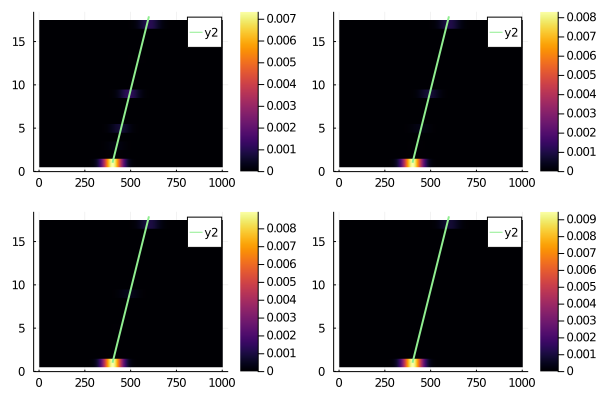

In [1667]:
# plot joint distributions 
v = 1:length(pop.grid_z)
mu_grid = v[pop.grid_z.==0][1]
theta_grid = v[pop.grid_z.==theta][1]

slope = theta_grid - mu_grid 
slope = slope / length(pop.grid_p)

x = mu_grid:(theta_grid-1)
y = (x .- mu_grid)/slope .+ 1

p1 = Plots.heatmap(pop.trait[1])
Plots.plot!(x,y, width = 2, color = "light green")
p2 = Plots.heatmap(pop.trait[3])
Plots.plot!(x,y, width = 2, color = "light green")
p3 = Plots.heatmap(pop.trait[5])
Plots.plot!(x,y, width = 2, color = "light green")
p4 = Plots.heatmap(pop.trait[7])
Plots.plot!(x,y, width = 2, color = "light green")

plot(p1,p2,p3,p4)

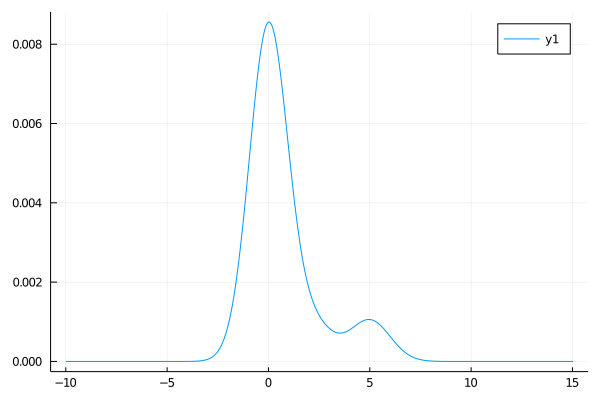

In [1646]:
# plot marginal distirbuiton over traits 
Plots.plot(pop.grid_z,transpose(mapslices(sum,pop.trait[1], dims = 1)))

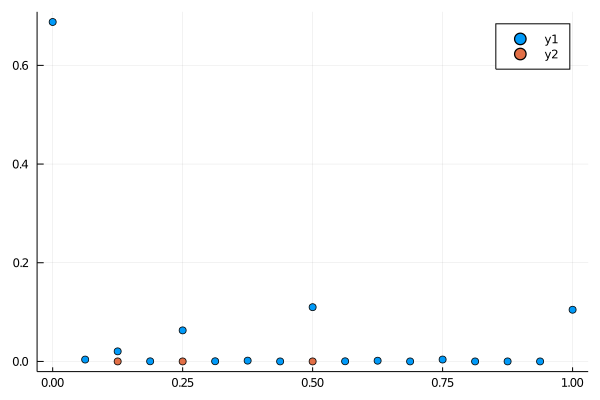

In [1671]:
# plot marginal distribution over pedigrees
Plots.scatter((pop.grid_p.-1)./16,mapslices(sum,pop.trait[1], dims = 2))
Plots.scatter!([0.125,0.25,0.5],[0,0,0])

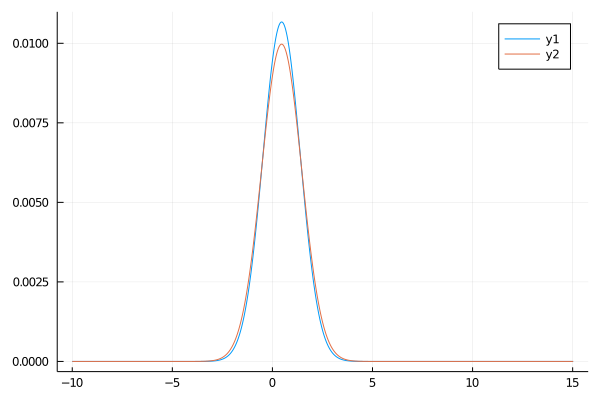

In [1649]:
# Plot trait distribution conditional on 
dsn = pop.trait[1][3,:]
dsn = dsn ./ sum(dsn)
mu = sum(pop.grid_z .* dsn)
Plots.plot(pop.grid_z,dsn)
d = Distributions.Normal(mu, Vle)
d_aprox = pdf.(d, pop.grid_z)
d_aprox = d_aprox ./ sum(d_aprox)
Plots.plot!(pop.grid_z,d_aprox)

# Testing means only algorithm

In [1709]:
pi = [0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1]
mu = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0]

pi_new = zeros(9)
mu_new = zeros(9)

for i in 1:9
    pi
end 

In [1710]:
pi .* transpose(pi)

9×9 Array{Float64,2}:
 0.81  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.09
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.09  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.01

In [1711]:
(collect(0:8) .+ transpose(collect(0:8)))

9×9 Array{Int64,2}:
 0  1   2   3   4   5   6   7   8
 1  2   3   4   5   6   7   8   9
 2  3   4   5   6   7   8   9  10
 3  4   5   6   7   8   9  10  11
 4  5   6   7   8   9  10  11  12
 5  6   7   8   9  10  11  12  13
 6  7   8   9  10  11  12  13  14
 7  8   9  10  11  12  13  14  15
 8  9  10  11  12  13  14  15  16

In [1712]:
pi .* (mu .+ transpose(mu))./2

9×9 Array{Float64,2}:
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.25
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.5

In [1720]:
pi = pi .* transpose(pi)
sm = pi .* (mu .+ transpose(mu))./2
new = zeros(18)
newsm = zeros(18)
for i in 0:8
    for j in 0:8
        new[i+j+1] += pi[i+1,j+1]
        newsm[i+j+1] += sm[i+1,j+1]
    end
end 

In [1721]:
newsm ./(new .+ 0.00000000001)

18-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 2.49999999845679
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 4.99999950000005
 0.0

In [1722]:
new

18-element Array{Float64,1}:
 0.6561000000000001
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.016200000000000003
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.00010000000000000005
 0.0

In [1723]:
include("utils.jl")

Main.utils

In [1733]:
utils.collapse_v(newsm) ./ (utils.collapse_v(new) .+ 10^-12)

9-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 2.4999999998456794
 0.0
 0.0
 0.0
 4.99999995

In [1728]:
utils.collapse_v(new)

9-element Array{Float64,1}:
 0.6561000000000001
 0.0
 0.0
 0.0
 0.016200000000000003
 0.0
 0.0
 0.0
 0.00010000000000000005

In [1729]:
newsm

18-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.04050000000000001
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0005000000000000002
 0.0